<a href="https://colab.research.google.com/github/mayank-patidar/Daily-Fantasy-Sports-NBA/blob/main/OPIM_5641_DFS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPIM 5641 BDM

**Mayank Patidar (map20016)**

# Daily Fantasy Sports Project

In daily fantasy sports (DFS), contests are arranged based on the daily games in a sport.  In this project, we will be focusing on the National Basketball Association (NBA) competitions. 

In NBA DFS, individual players receive points for gaining particular real-game statistics.  Contestants are to select the best collection of players they can from the pool of available players, subject to certain lineup restrictions.  We will be focusing on Classic competitions. 

https://www.draftkings.com/help/rules/nba

For this project, you are to create on optimization model for selecting an entry.  Each day starting on May 19, 2021, we will have a private DraftKings contest, where we will compete against each other (for free of course!).  On Friday, May 28th, we will have our final competition.  Any team beating my score on any day will receive 1 extra bonus point for the class porject.  The team with the best score on Friday, May 28th will also receive 5 bonus points on their project!

In order to succeed at DFS, you need (1) good projections and (2) good optimization.  I will supply you with a historical data set providing the stats for each player during this NBA season.  You can choose to use this data set to create your own projections, or you can use any one of the many sites that provide DFS projections daily.  One example is Daily Fantasy Fuel (https://www.dailyfantasyfuel.com/). 

The project requires you to do the following:
1. Create an optimization model that reads in a Daily Fantasy Fuel download and select the single optimal entry for the projections found.
2. Create an opitmization model to identify the top 100 legal entries using only Daily Fantasy Fuel projections.
3. Ultimately, however, winning a DFS contest requires not only finding high quality lineups, but also considering variance, player-by-player correlation, multiple projection sources, etc.  Use some creativity to bring in additional data and analysis to help you craft the perfect lineup! Enter it into DraftKings daily and see if you can beat me!

Each team is to create a single DraftKings account that will be used to competition. Please email the account to your instructor no later than May 17, 2021.  I will use those accounts to create a contest that only people in our class can join. Your team should have one account. Note that DraftKings does not allow users to share accounts, and so please only have one team member interact with the website.  You will be able to see the live results even if you aren't the team member interfacing with DraftKings. 

Note: Because the playoffs will be happening during our contests, the schedule is still a bit up in the air.  Therefore, we may move the final competition to another date.

The model need only be the solution determining device for the last competition, on May 28th. The other days, you are free to enter a solution in any way you want.  For the May 28th submission, please submit your code, and also the Fantasy Fuel download that you used for creating your lineup, and any additional data you used.


## Dataset Used or Refered From


1.   https://www.numberfire.com/nba/daily-fantasy/daily-basketball-projections

2.   https://www.draftkings.com/help/rules/nba

3.   https://www.dailyfantasyfuel.com/nba/

4.   https://www.lineups.com/nba/lineups

5.   https://www.rotowire.com/basketball/nba-lineups.php




## DraftKings Lineup Rules
The mandatory Constraints for the game are:

1. Sum of Salary of 8 players picked $\leq$  **$50,000**

2. Lineup Size of teams = **8** Players

3. Players from at least 2 different games should be selected

4. Lineup should have 1 player each at these 8 positions:

* Point Guard (PG)
* Shooting Guard (SG)
* Shooting Forward (SF)
* Power Forward (PF)
* Center (C)
* Guard (G): (PG/SG)
* Forward (F): (SF/PF)
* Utility (U):(PG/SG/SF/PF/C)

<img src = 'https://miro.medium.com/max/1680/1*eH1bQDoLyUdv0oxCXXasbg.png'>

## Import Modules for Solver

In [ ]:
# import modules

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *

# Import Pandas and Numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the data into Pandas DataFrame
nba_df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/OPIM 5641 BDM Team 01/Project/28May_csv.csv'))
nba_df

,first_name,last_name,name,position,position_alt,injury_status,game_date,slate,team,opp,Minutes_Avg,spread,over_under,implied_team_score,salary,L5_ppg_floor,L5_ppg_avg,L5_ppg_max,ppg_projection,value_projection,ppg_actual,In_Linup_Possible,Value_Calc
0,Luka,Doncic,Luka Doncic,PG,SF,NaN,5/28/2021,NaN,DAL,LAC,37.91,2.0,219.5,108.8,11000,10,37.5,55.9,70.0,53.8,4.89,1,55.300
1,James,Harden,James Harden,PG,SG,NaN,5/28/2021,NaN,BKN,BOS,35.31,-7.5,227.0,117.3,10300,15,5.8,36.0,53.8,49.0,4.76,1,51.450
2,Kevin,Durant,Kevin Durant,SF,PF,NaN,5/28/2021,NaN,BKN,BOS,35.87,-7.5,227.0,117.3,9600,21,30.3,45.5,53.5,46.5,4.84,1,49.575
3,Julius,Randle,Julius Randle,PF,C,NaN,5/28/2021,NaN,NY,ATL,37.41,4.0,211.0,103.5,9700,28,37.0,48.0,71.3,46.3,4.77,1,44.225
4,Jayson,Tatum,Jayson Tatum,PF,NaN,NaN,5/28/2021,NaN,BOS,BKN,37.06,7.5,227.0,109.8,9400,14,22.5,45.4,73.5,45.0,4.79,1,45.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Brandon,Goodwin,Brandon Goodwin,SG,NaN,O,5/28/2021,NaN,ATL,NY,0.00,-4.0,211.0,107.5,3000,2,6.5,10.8,18.8,0.0,0.00,0,0.000
73,Jaylen,Brown,Jaylen Brown,SG,NaN,O,5/28/2021,NaN,BOS,BKN,0.00,7.5,227.0,109.8,3000,17,34.3,46.4,67.3,0.0,0.00,0,0.000
74,JJ,Redick,JJ Redick,SG,NaN,O,5/28/2021,NaN,DAL,LAC,0.00,2.0,219.5,108.8,3000,12,0.0,4.6,9.5,0.0,0.00,0,0.000
75,Spencer,Dinwiddie,Spencer Dinwiddie,SG,NaN,O,5/28/2021,NaN,BKN,BOS,0.00,-7.5,227.0,117.3,3000,20,15.0,28.7,39.0,0.0,0.00,0,0.000


In [ ]:
## Changing the name of Columns because of incorrect data downloaded from website
nba_df = nba_df.rename(columns={'L5_ppg_floor':'Rank','L5_ppg_avg':'Last5_Min',
                                'L5_ppg_max':'Last5_Avg','ppg_projection':'Last5_Max'})
nba_df

,first_name,last_name,name,position,position_alt,injury_status,game_date,slate,team,opp,Minutes_Avg,spread,over_under,implied_team_score,salary,Rank,Last5_Min,Last5_Avg,Last5_Max,value_projection,ppg_actual,In_Linup_Possible,Value_Calc
0,Luka,Doncic,Luka Doncic,PG,SF,NaN,5/28/2021,NaN,DAL,LAC,37.91,2.0,219.5,108.8,11000,10,37.5,55.9,70.0,53.8,4.89,1,55.300
1,James,Harden,James Harden,PG,SG,NaN,5/28/2021,NaN,BKN,BOS,35.31,-7.5,227.0,117.3,10300,15,5.8,36.0,53.8,49.0,4.76,1,51.450
2,Kevin,Durant,Kevin Durant,SF,PF,NaN,5/28/2021,NaN,BKN,BOS,35.87,-7.5,227.0,117.3,9600,21,30.3,45.5,53.5,46.5,4.84,1,49.575
3,Julius,Randle,Julius Randle,PF,C,NaN,5/28/2021,NaN,NY,ATL,37.41,4.0,211.0,103.5,9700,28,37.0,48.0,71.3,46.3,4.77,1,44.225
4,Jayson,Tatum,Jayson Tatum,PF,NaN,NaN,5/28/2021,NaN,BOS,BKN,37.06,7.5,227.0,109.8,9400,14,22.5,45.4,73.5,45.0,4.79,1,45.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Brandon,Goodwin,Brandon Goodwin,SG,NaN,O,5/28/2021,NaN,ATL,NY,0.00,-4.0,211.0,107.5,3000,2,6.5,10.8,18.8,0.0,0.00,0,0.000
73,Jaylen,Brown,Jaylen Brown,SG,NaN,O,5/28/2021,NaN,BOS,BKN,0.00,7.5,227.0,109.8,3000,17,34.3,46.4,67.3,0.0,0.00,0,0.000
74,JJ,Redick,JJ Redick,SG,NaN,O,5/28/2021,NaN,DAL,LAC,0.00,2.0,219.5,108.8,3000,12,0.0,4.6,9.5,0.0,0.00,0,0.000
75,Spencer,Dinwiddie,Spencer Dinwiddie,SG,NaN,O,5/28/2021,NaN,BKN,BOS,0.00,-7.5,227.0,117.3,3000,20,15.0,28.7,39.0,0.0,0.00,0,0.000


In [ ]:
## Dataset have some players that are out for the game, mentioned as 'O' in the injury status column, 
### so we had to remove these rows from the data frame
nba_df = nba_df[nba_df.injury_status != 'O']
nba_df

,first_name,last_name,name,position,position_alt,injury_status,game_date,slate,team,opp,Minutes_Avg,spread,over_under,implied_team_score,salary,Rank,Last5_Min,Last5_Avg,Last5_Max,value_projection,ppg_actual,In_Linup_Possible,Value_Calc
0,Luka,Doncic,Luka Doncic,PG,SF,NaN,5/28/2021,NaN,DAL,LAC,37.91,2.0,219.5,108.8,11000,10,37.5,55.9,70.0,53.8,4.89,1,55.300
1,James,Harden,James Harden,PG,SG,NaN,5/28/2021,NaN,BKN,BOS,35.31,-7.5,227.0,117.3,10300,15,5.8,36.0,53.8,49.0,4.76,1,51.450
2,Kevin,Durant,Kevin Durant,SF,PF,NaN,5/28/2021,NaN,BKN,BOS,35.87,-7.5,227.0,117.3,9600,21,30.3,45.5,53.5,46.5,4.84,1,49.575
3,Julius,Randle,Julius Randle,PF,C,NaN,5/28/2021,NaN,NY,ATL,37.41,4.0,211.0,103.5,9700,28,37.0,48.0,71.3,46.3,4.77,1,44.225
4,Jayson,Tatum,Jayson Tatum,PF,NaN,NaN,5/28/2021,NaN,BOS,BKN,37.06,7.5,227.0,109.8,9400,14,22.5,45.4,73.5,45.0,4.79,1,45.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Carsen,Edwards,Carsen Edwards,PG,SG,NaN,5/28/2021,NaN,BOS,BKN,0.09,7.5,227.0,109.8,3000,4,0.0,6.4,15.0,7.0,2.33,0,7.000
66,Semi,Ojeleye,Semi Ojeleye,PF,NaN,NaN,5/28/2021,NaN,BOS,BKN,0.93,7.5,227.0,109.8,3000,14,0.0,5.6,16.8,6.8,2.25,0,0.700
67,Timothe,Luwawu-Cabarrot,Timothe Luwawu-Cabarrot,SF,PF,NaN,5/28/2021,NaN,BKN,BOS,0.17,-7.5,227.0,117.3,3000,21,0.0,4.7,11.0,6.3,2.08,0,0.100
68,Alize,Johnson,Alize Johnson,SF,PF,NaN,5/28/2021,NaN,BKN,BOS,0.11,-7.5,227.0,117.3,3000,21,0.0,3.7,7.8,5.8,1.92,0,5.800


# Prepare Data

In [ ]:
# the 8 positions for the lineup
lineup_req = [['PG'],
              ['SG'],
              ['SF'],
              ['PF'],
              ['C'],
              ['PG','SG'],
              ['SF','PF'],
              ['PG','SG','SF','PF','C']]

# number of positions in lineup i.e. 8
n_positions = len(lineup_req)
print('Positions to fill:',n_positions)

# total number of players for the day
n_players = len(nba_df)
print('Number of players for the day:',n_players)

# salary cap that is available
max_salary = 50000

# matches for today
match = [['DAL','LAC'],                                                                                         
         ['BKN','BOS'],
         ['NY','ATL']]

# Number of Matches for Today
number_of_match = len(match)
print('Number of matches:',number_of_match)

teams_tonight = ['DAL','LAC','BKN','BOS','NY','ATL']
number_of_teams = len(teams_tonight)
print('Number of Teams:',number_of_teams)

Positions to fill: 8
Number of players for the day: 70
Number of matches: 3
Number of Teams: 6


# Part 01

## Single entry Optimization Model

Create an optimization model that reads in a Daily Fantasy Fuel download and select the single optimal entry for the projections found.

In [ ]:
# create a model
model = ConcreteModel()

# define variables
model.player_selection = Var( range(n_players) , range(n_positions) , within = Binary )

# Constraints List
model.position_constraint = ConstraintList()
model.salary_constraint = ConstraintList()

## Position constraints and One player at each position Constraint
for i in range(n_positions):
  position_fill = 0.0
  for j in range(n_players):
    position_fill += model.player_selection[j,i]
    
    # constraint for only 1 player at each position
    if nba_df['position'][i] or nba_df['position_alt'][i] in lineup_req[j]:
      model.position_constraint.add(model.player_selection[j,i] <= 1)
    else:
       model.position_constraint.add(model.player_selection[j,i] == 0)

  model.position_constraint.add( position_fill == 1 )

## Constraints for picking the player only once
for i in range(n_players):
  number_of_times_picked = 0.0
  for j in range(n_positions):
    number_of_times_picked += model.player_selection[i,j]
  model.position_constraint.add( number_of_times_picked <= 1 )

## Constraint for Maximum available Salary for the team i.e 50000
salary = 0.0
for i in range(n_players):
  for j in range(n_positions):
    salary += model.player_selection[i,j] * nba_df['salary'][i]
model.salary_constraint.add( salary <= max_salary )

## Point Constraint of player
model.points_cons = ConstraintList()

## Constraint for Team Selection from every Match atleast 1 player from 2 teams
team_selection = 0.0
for k in range(number_of_teams):
  for j in range(n_players):
    team_selection += model.player_selection[j,k]
    if nba_df['team'][j] or nba_df['opp'][j] in teams_tonight[k]:
      model.position_constraint.add(model.player_selection[j,k] <= 1)
    else:
      model.position_constraint.add(model.player_selection[j,k] == 0)
# this select expression >3 means atleast 3 teams selected, that means atleats 2 game constraint is satisfied
model.position_constraint.add( team_selection >= 3 )      

## Objective Funtion for our Model
objective_expr = 0.0
for i in range(n_players):
  for j in range(n_positions):
    objective_expr += model.player_selection[i,j] * nba_df['value_projection'][i]

model.total_projected_points = Objective(
    expr = objective_expr,
    sense = maximize
)

# Solve the Model
opt = SolverFactory('cbc')            
opt_success = opt.solve(model, tee=False, timelimit=60)

### Print output as a dataframe
print('Projected Value:',value(model.total_projected_points))

list_temp = []
for i in range(n_positions):
  for j in range(n_players):
    if value(model.player_selection[j,i]) > 0.9:
      dict_t = {'First Name':nba_df['first_name'][j],
                'Last Name':nba_df['last_name'][j],
                'Position':nba_df['position'][j],
                'Alternate Position':nba_df['position_alt'][j],
                'Team':nba_df['team'][j],
                'Value Projection':nba_df['value_projection'][j],
                'Salary':'$'+str(nba_df['salary'][j])
                }
      list_temp.append(dict_t)
print_df = pd.DataFrame(list_temp)
print_df.index= print_df.index+1
print_df

    containing a solution
Projected Value: 244.80000000000007


,First Name,Last Name,Position,Alternate Position,Team,Value Projection,Salary
1,Alec,Burks,SF,NaN,NY,25.3,$5000
2,Tim,Hardaway Jr.,SG,SF,DAL,26.8,$5500
3,Nicolas,Batum,SF,PF,LAC,19.3,$4000
4,Luka,Doncic,PG,SF,DAL,53.8,$11000
5,Rajon,Rondo,PG,NaN,LAC,22.3,$4600
6,Bogdan,Bogdanovic,PG,SG,ATL,34.0,$6900
7,Kawhi,Leonard,SF,NaN,LAC,41.5,$8500
8,Kevin,Huerter,SG,SF,ATL,21.8,$4500


In [ ]:
#model.pprint()

# Part 02

## 100 Different Lineups for the optimized Model

Create an opitmization model to identify the top 100 legal entries using only Daily Fantasy Fuel projections.

We have created a while loop to go through the 100 itterations for the model. Every time the loop runs the model a new projection value is obtained which is slightly less than the previous one. Just to avoid time consumption we have ran the model for 10 times as a sample to verify our lineups.

In [ ]:
counter = 0
previous_value = 1000

while counter < 10:

  # create a model
  model = ConcreteModel()

  # define variables
  model.player_selection = Var( range(n_players) , range(n_positions) , within = Binary )

  # Constraints List
  model.position_constraint = ConstraintList()
  model.salary_constraint = ConstraintList()

  model.solutions_eliminator_conlist = ConstraintList()

  ## Position constraints and One player at each position Constraint
  for i in range(n_positions):
    position_fill = 0.0
    for j in range(n_players):
      position_fill += model.player_selection[j,i]
      
      # constraint for only 1 player at each position
      if nba_df['position'][i] or nba_df['position_alt'][i] in lineup_req[j]:
        model.position_constraint.add(model.player_selection[j,i] <= 1)
      else:
        model.position_constraint.add(model.player_selection[j,i] == 0)

    model.position_constraint.add( position_fill == 1 )

  ## Constraints for picking the player only once
  for i in range(n_players):
    number_of_times_picked = 0.0
    for j in range(n_positions):
      number_of_times_picked += model.player_selection[i,j]
    model.position_constraint.add( number_of_times_picked <= 1 )

  ## Constraint for Maximum available Salary for the team i.e 50000
  salary = 0.0
  for i in range(n_players):
    for j in range(n_positions):
      salary += model.player_selection[i,j] * nba_df['salary'][i]
  model.salary_constraint.add( salary <= max_salary )

  ## Constraint for Team Selection from every Match atleast 1 player from 2 teams
  team_selection = 0.0
  for k in range(number_of_teams):
    for j in range(n_players):
      team_selection += model.player_selection[j,k]
      if nba_df['team'][j] or nba_df['opp'][j] in teams_tonight[k]:
        model.position_constraint.add(model.player_selection[j,k] <= 1)
      else:
        model.position_constraint.add(model.player_selection[j,k] == 0)
  # this select expression >3 means atleast 3 teams selected, that means atleats 2 game constraint is satisfied
  model.position_constraint.add( team_selection >= 3 )   

  # Objective Function
  # Maximize projected points for the team of 8 players using the Value Projection from the fantasyfuel data

  objective_expr = 0.0
  for i in range(n_players):
    for j in range(n_positions):
      objective_expr += model.player_selection[i,j] * nba_df['value_projection'][i]

  model.total_projected_points = Objective(
      expr = objective_expr,
      sense = maximize
  )

  ####### The Constraint for having new projected score and team at 100 iterations #############
  model.solutions_eliminator_conlist.add(model.total_projected_points <= previous_value -0.1)
  ##############################################################################################

  # Solve the Model
  opt = SolverFactory('cbc')            
  opt_success = opt.solve(model, tee=False, timelimit=60)

  ### Print output as a dataframe
  print('Projected Value:',value(model.total_projected_points))

  list_temp = []
  for i in range(n_positions):
    for j in range(n_players):
      if value(model.player_selection[j,i]) > 0.9:
        dict_t = {'First Name':nba_df['first_name'][j],
                  'Last Name':nba_df['last_name'][j],
                  'Position':nba_df['position'][j],
                  'Alternate Position':nba_df['position_alt'][j],
                  'Team':nba_df['team'][j],
                  'Value Projection':nba_df['value_projection'][j],
                  'Salary':'$'+str(nba_df['salary'][j])
                  }
        list_temp.append(dict_t)
  print_df = pd.DataFrame(list_temp)
  print_df.index= print_df.index+1
  print_df
  print(print_df)

#### Counter +1 in the While Loop
  
  previous_value = value(model.total_projected_points)
  counter += 1


Projected Value: 244.80000000000007
  First Name     Last Name Position  ... Team Value Projection  Salary
1    Nicolas         Batum       SF  ...  LAC             19.3   $4000
2        Tim  Hardaway Jr.       SG  ...  DAL             26.8   $5500
3       Alec         Burks       SF  ...   NY             25.3   $5000
4      Kawhi       Leonard       SF  ...  LAC             41.5   $8500
5      Kevin       Huerter       SG  ...  ATL             21.8   $4500
6       Luka        Doncic       PG  ...  DAL             53.8  $11000
7      Rajon         Rondo       PG  ...  LAC             22.3   $4600
8     Bogdan    Bogdanovic       PG  ...  ATL             34.0   $6900

[8 rows x 7 columns]
Projected Value: 244.70000000000005
  First Name     Last Name Position  ... Team Value Projection  Salary
1      Serge         Ibaka        C  ...  LAC             21.0   $4400
2      Kawhi       Leonard       SF  ...  LAC             41.5   $8500
3     Bogdan    Bogdanovic       PG  ...  ATL         

# Part 03

Ultimately, however, winning a DFS contest requires not only finding high quality lineups, but also considering variance, player-by-player correlation, multiple projection sources, etc.  Use some creativity to bring in additional data and analysis to help you craft the perfect lineup! Enter it into DraftKings daily and see if you can beat me!

We have tried 5 different models with merging some data and finding insights from the new data that we are working upon.

## Model 01 with focus on by default projection value that is already in the database

Our goal was to create a model with the help of Minimum, Average, and Maximum projection scrores of a player. We tried to revolve our model closer to Average values. The formula that we have used is as shown:

$Deciding Parameter = \dfrac{Minimum Points + 4* Average Points + Maximum Points}{6}$ 

**** Data is average of last 5 games

In [ ]:
# create a model
model = ConcreteModel()

# define variables
model.player_selection = Var( range(n_players) , range(n_positions) , within = Binary )

# Constraints List
model.position_constraint = ConstraintList()
model.salary_constraint = ConstraintList()

## Position constraints and One player at each position Constraint
for i in range(n_positions):
  position_fill = 0.0
  for j in range(n_players):
    position_fill += model.player_selection[j,i]
    
    if nba_df['position'][i] or nba_df['position_alt'][i] in lineup_req[j]:
      model.position_constraint.add(model.player_selection[j,i] <= 1)
    else:
       model.position_constraint.add(model.player_selection[j,i] == 0)

  model.position_constraint.add( position_fill == 1 )

## Constraints for picking the player only once
for i in range(n_players):
  number_of_times_picked = 0.0
  for j in range(n_positions):
    number_of_times_picked += model.player_selection[i,j]
  model.position_constraint.add( number_of_times_picked <= 1 )

## Constraint for Maximum available Salary for the team
salary = 0.0
for i in range(n_players):
  for j in range(n_positions):
    salary += model.player_selection[i,j] * nba_df['salary'][i]
model.salary_constraint.add( salary <= max_salary )

## Constraint for Team Selection from every Match atleast 1 player from 2 teams
team_selection = 0.0
for k in range(number_of_teams):
  for j in range(n_players):
    team_selection += model.player_selection[j,k]
    if nba_df['team'][j] or nba_df['opp'][j] in teams_tonight[k]:
      model.position_constraint.add(model.player_selection[j,k] <= 1)
    else:
      model.position_constraint.add(model.player_selection[j,k] == 0)
# this select expression >3 means atleast 3 teams selected, that means atleats 2 game constraint is satisfied
model.position_constraint.add( team_selection >= 3 )   

# Objective Function
# Maximize projected points for the team
objective_expr = 0.0
for i in range(n_players):
  for j in range(n_positions):
    objective_expr += model.player_selection[i,j] * ((nba_df['Last5_Min'][i] + 4* nba_df['Last5_Avg'][i] + nba_df['Last5_Max'][i])/6)

model.total_projected_points = Objective(
    expr = objective_expr,
    sense = maximize
)

# Solve the Model
opt = SolverFactory('cbc')            
opt_success = opt.solve(model, tee=False, timelimit=60)

### Print output as a dataframe
sum_value = 0.0
list_temp = []
for i in range(n_positions):
  for j in range(n_players):
    if value(model.player_selection[j,i]) > 0.9:
      sum_value += nba_df['value_projection'][j]
      dict_t = {'First Name':nba_df['first_name'][j],
                'Last Name':nba_df['last_name'][j],
                'Position':nba_df['position'][j],
                'Alternate Position':nba_df['position_alt'][j],
                'Team':nba_df['team'][j],
                'Value Projection':nba_df['value_projection'][j],
                'Salary':'$'+str(nba_df['salary'][j])
                }
      list_temp.append(dict_t)
print_df = pd.DataFrame(list_temp)
print_df.index= print_df.index+1
print('Projected Value for the lineup :',sum_value)
print_df

    containing a solution
Projected Value for the lineup : 239.20000000000005


,First Name,Last Name,Position,Alternate Position,Team,Value Projection,Salary
1,Bruce,Brown,SF,NaN,BKN,18.0,$3800
2,Kawhi,Leonard,SF,NaN,LAC,41.5,$8500
3,Bogdan,Bogdanovic,PG,SG,ATL,34.0,$6900
4,Luka,Doncic,PG,SF,DAL,53.8,$11000
5,Trae,Young,PG,NaN,ATL,41.3,$8600
6,Alec,Burks,SF,NaN,NY,25.3,$5000
7,Mike,James,PG,NaN,BKN,11.8,$3000
8,Onyeka,Okongwu,C,NaN,ATL,13.5,$3000


## Model 02 with Calculated Projection Value

We have Merged a value column of **Value_Calc** in the database using the Rebound, Assist, Steal and other socring options in a game.

The formula we have used to generate this column is:

$Value Calc = Points + 1.25*Rebound + 1.5*Assist + 2*Steal + 2*Block - 0.5*TurnOver$

We have tried to maximize our earlier value projections on the basis of these scroes of a player for last 5 games

In [ ]:
# create a model
model = ConcreteModel()

# define variables
model.player_selection = Var( range(n_players) , range(n_positions) , within = Binary )

# Constraints List
model.position_constraint = ConstraintList()
model.salary_constraint = ConstraintList()

## Position constraints and One player at each position Constraint
for i in range(n_positions):
  position_fill = 0.0
  for j in range(n_players):
    position_fill += model.player_selection[j,i]
    
    # constraint for only 1 player at each position
    if nba_df['position'][j] or nba_df['position_alt'][j] in lineup_req[j]:
      model.position_constraint.add(model.player_selection[j,i] <= 1)
    else:
       model.position_constraint.add(model.player_selection[j,i] == 0)

  model.position_constraint.add( position_fill == 1 )


## Constraints for picking the player only once
for i in range(n_players):
  number_of_times_picked = 0.0
  for j in range(n_positions):
    number_of_times_picked += model.player_selection[i,j]
  model.position_constraint.add( number_of_times_picked <= 1 )


## Constraint for Maximum available Salary for the team i.e 50000
salary = 0.0
for i in range(n_players):
  for j in range(n_positions):
    salary += model.player_selection[i,j] * nba_df['salary'][i]
model.salary_constraint.add( salary <= max_salary )

## Constraint for Team Selection from every Match atleast 1 player from 2 teams
team_selection = 0.0
for k in range(number_of_teams):
  for j in range(n_players):
    team_selection += model.player_selection[j,k]
    if nba_df['team'][j] or nba_df['opp'][j] in teams_tonight[k]:
      model.position_constraint.add(model.player_selection[j,k] <= 1)
    else:
      model.position_constraint.add(model.player_selection[j,k] == 0)
# this select expression >3 means atleast 3 teams selected, that means atleats 2 game constraint is satisfied
model.position_constraint.add( team_selection >= 3 )   

objective_expr = 0.0
for i in range(n_players):
  for j in range(n_positions):
    objective_expr += model.player_selection[i,j] * nba_df['Value_Calc'][i]

model.total_projected_points = Objective(
    expr = objective_expr,
    sense = maximize
)

# Solve the Model
opt = SolverFactory('cbc')            
opt_success = opt.solve(model, tee=False, timelimit=60)

### Print output as a dataframe
sum_value = 0.0
list_temp = []
for i in range(n_positions):
  for j in range(n_players):
    if value(model.player_selection[j,i]) > 0.9:
      sum_value += nba_df['value_projection'][j]
      dict_t = {'First Name':nba_df['first_name'][j],
                'Last Name':nba_df['last_name'][j],
                'Position':nba_df['position'][j],
                'Alternate Position':nba_df['position_alt'][j],
                'Team':nba_df['team'][j],
                'Value Projection':nba_df['value_projection'][j],
                'Salary':'$'+str(nba_df['salary'][j])
                }
      list_temp.append(dict_t)
print_df = pd.DataFrame(list_temp)
print_df.index= print_df.index+1
print('Projected Value for the lineup :',sum_value)
print_df

Projected Value for the lineup : 237.3


,First Name,Last Name,Position,Alternate Position,Team,Value Projection,Salary
1,John,Collins,PF,C,ATL,30.0,$6500
2,Kawhi,Leonard,SF,NaN,LAC,41.5,$8500
3,Evan,Fournier,SG,SF,BOS,29.0,$6200
4,Nicolas,Claxton,C,NaN,BKN,15.0,$3100
5,Trae,Young,PG,NaN,ATL,41.3,$8600
6,Paul,George,SG,NaN,LAC,39.0,$8100
7,Robert,Williams,C,NaN,BOS,24.0,$5200
8,Maxi,Kleber,PF,C,DAL,17.5,$3700


## Model 03 with Maximizing the game time a player gets

From the plot below, it can be seen clearlt that a player who has played maximum minutes is supposed to score good in the match. That is why we have tried to optimize our model on the basis of maximum minutes played

Text(0, 0.5, 'Points Value Projection')

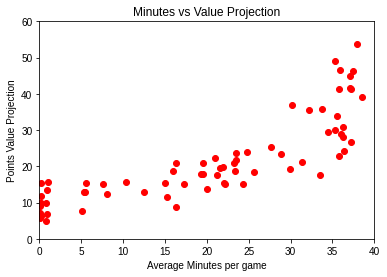

In [ ]:
### Plot of Minutes vs Value Projection
plot01= scatter(nba_df['Minutes_Avg'],nba_df['value_projection'],color='red')
plt.style.use('seaborn-whitegrid')
plt.xlim(0,40)
plt.ylim(0,60)
plt.title("Minutes vs Value Projection")
plt.xlabel("Average Minutes per game")
plt.ylabel("Points Value Projection")

In [ ]:
# create a model
model = ConcreteModel()

# define variables
model.player_selection = Var( range(n_players) , range(n_positions) , within = Binary )

# Constraints List
model.position_constraint = ConstraintList()
model.salary_constraint = ConstraintList()

## Position constraints and One player at each position Constraint
for i in range(n_positions):
  position_fill = 0.0
  for j in range(n_players):
    position_fill += model.player_selection[j,i]
    
    # constraint for only 1 player at each position
    if nba_df['position'][i] or nba_df['position_alt'][i] in lineup_req[j]:
      model.position_constraint.add(model.player_selection[j,i] <= 1)
    else:
       model.position_constraint.add(model.player_selection[j,i] == 0)

  model.position_constraint.add( position_fill == 1 )

## Constraints for picking the player only once
for i in range(n_players):
  number_of_times_picked = 0.0
  for j in range(n_positions):
    number_of_times_picked += model.player_selection[i,j]
  model.position_constraint.add( number_of_times_picked <= 1 )


## Constraint for Maximum available Salary for the team i.e 50000
salary = 0.0
for i in range(n_players):
  for j in range(n_positions):
    salary += model.player_selection[i,j] * nba_df['salary'][i]
model.salary_constraint.add( salary <= max_salary )

## Constraint for Team Selection from every Match atleast 1 player from 2 teams
team_selection = 0.0
for k in range(number_of_teams):
  for j in range(n_players):
    team_selection += model.player_selection[j,k]
    if nba_df['team'][j] or nba_df['opp'][j] in teams_tonight[k]:
      model.position_constraint.add(model.player_selection[j,k] <= 1)
    else:
      model.position_constraint.add(model.player_selection[j,k] == 0)
# this select expression >3 means atleast 3 teams selected, that means atleats 2 game constraint is satisfied
model.position_constraint.add( team_selection >= 3 )   
objective_expr = 0.0
for i in range(n_players):
  for j in range(n_positions):
    objective_expr += model.player_selection[i,j] * nba_df['Minutes_Avg'][i]

model.total_projected_points = Objective(
    expr = objective_expr,
    sense = maximize
)

# Solve the Model
opt = SolverFactory('cbc')            
opt_success = opt.solve(model, tee=False, timelimit=60)

### Print output as a dataframe
sum_value = 0.0
list_temp = []
for i in range(n_positions):
  for j in range(n_players):
    if value(model.player_selection[j,i]) > 0.9:
      sum_value += nba_df['value_projection'][j]
      dict_t = {'First Name':nba_df['first_name'][j],
                'Last Name':nba_df['last_name'][j],
                'Position':nba_df['position'][j],
                'Alternate Position':nba_df['position_alt'][j],
                'Team':nba_df['team'][j],
                'Value Projection':nba_df['value_projection'][j],
                'Salary':'$'+str(nba_df['salary'][j])
                }
      list_temp.append(dict_t)
print_df = pd.DataFrame(list_temp)
print_df.index= print_df.index+1
print('Projected Value for the lineup :',sum_value)
print_df

Projected Value for the lineup : 234.7


,First Name,Last Name,Position,Alternate Position,Team,Value Projection,Salary
1,Marcus,Smart,PG,SG,BOS,28.0,$5900
2,Tim,Hardaway Jr.,SG,SF,DAL,26.8,$5500
3,Derrick,Rose,PG,SG,NY,30.8,$6400
4,Joe,Harris,SG,SF,BKN,24.3,$5100
5,Paul,George,SG,NaN,LAC,39.0,$8100
6,Bogdan,Bogdanovic,PG,SG,ATL,34.0,$6900
7,Dorian,Finney-Smith,SF,PF,DAL,22.8,$4800
8,Evan,Fournier,SG,SF,BOS,29.0,$6200


## Model 04 with focus on default projection, average value and calculated value in last 5 games

Our goal was to create a model with the help of Average, Projected, and Calculated scores of a player. We tried to revolve our model closer to Projected values. The formula that we have used is as shown:

$Deciding Parameter = \dfrac{Average Points + 4* Projected Points + Calculated Points}{6}$ 

**** Data is average of last 5 games

In [ ]:
# create a model
model = ConcreteModel()

# define variables
model.player_selection = Var( range(n_players) , range(n_positions) , within = Binary )

# Constraints List
model.position_constraint = ConstraintList()
model.salary_constraint = ConstraintList()

# ### for 100 loops
# model.solutions_eliminator_conlist = ConstraintList()

## Position constraints and One player at each position Constraint
for i in range(n_positions):
  position_fill = 0.0
  for j in range(n_players):
    position_fill += model.player_selection[j,i]
    
    if nba_df['position'][i] or nba_df['position_alt'][i] in lineup_req[j]:
      model.position_constraint.add(model.player_selection[j,i] <= 1)
    else:
       model.position_constraint.add(model.player_selection[j,i] == 0)

  model.position_constraint.add( position_fill == 1 )

## Constraints for picking the player only once
for i in range(n_players):
  number_of_times_picked = 0.0
  for j in range(n_positions):
    number_of_times_picked += model.player_selection[i,j]
  model.position_constraint.add( number_of_times_picked <= 1 )


## Constraint for Maximum available Salary for the team
salary = 0.0
for i in range(n_players):
  for j in range(n_positions):
    salary += model.player_selection[i,j] * nba_df['salary'][i]
model.salary_constraint.add( salary <= max_salary )

## Constraint for Team Selection from every Match atleast 1 player from 2 teams
team_selection = 0.0
for k in range(number_of_teams):
  for j in range(n_players):
    team_selection += model.player_selection[j,k]
    if nba_df['team'][j] or nba_df['opp'][j] in teams_tonight[k]:
      model.position_constraint.add(model.player_selection[j,k] <= 1)
    else:
      model.position_constraint.add(model.player_selection[j,k] == 0)
# this select expression >3 means atleast 3 teams selected, that means atleats 2 game constraint is satisfied
model.position_constraint.add( team_selection >= 3 )   


# Objective Function
# Maximize projected points for the team
objective_expr = 0.0
for i in range(n_players):
  for j in range(n_positions):
    objective_expr += model.player_selection[i,j] * ((nba_df['Last5_Avg'][i] + 4* nba_df['value_projection'][i] + nba_df['Value_Calc'][i])/6)

model.total_projected_points = Objective(
    expr = objective_expr,
    sense = maximize
)

# Solve the Model
opt = SolverFactory('cbc')            
opt_success = opt.solve(model, tee=False, timelimit=60)

### Print output as a dataframe
sum_value = 0.0
list_temp = []
for i in range(n_positions):
  for j in range(n_players):
    if value(model.player_selection[j,i]) > 0.9:
      sum_value += nba_df['value_projection'][j]
      dict_t = {'First Name':nba_df['first_name'][j],
                'Last Name':nba_df['last_name'][j],
                'Position':nba_df['position'][j],
                'Alternate Position':nba_df['position_alt'][j],
                'Team':nba_df['team'][j],
                'Value Projection':nba_df['value_projection'][j],
                'Salary':'$'+str(nba_df['salary'][j])
                }
      list_temp.append(dict_t)
print_df = pd.DataFrame(list_temp)
print_df.index= print_df.index+1
print('Projected Value for the lineup :',sum_value)
print_df


    containing a solution
Projected Value for the lineup : 242.90000000000003


,First Name,Last Name,Position,Alternate Position,Team,Value Projection,Salary
1,Nicolas,Claxton,C,NaN,BKN,15.0,$3100
2,Paul,George,SG,NaN,LAC,39.0,$8100
3,Kevin,Durant,SF,PF,BKN,46.5,$9600
4,Kawhi,Leonard,SF,NaN,LAC,41.5,$8500
5,Alec,Burks,SF,NaN,NY,25.3,$5000
6,Bruce,Brown,SF,NaN,BKN,18.0,$3800
7,Derrick,Rose,PG,SG,NY,30.8,$6400
8,Tim,Hardaway Jr.,SG,SF,DAL,26.8,$5500


## Model 05 With player only in possible line-up from source: 

https://www.rotowire.com/basketball/nba-lineups.php

The final Constraint that we have added to the model is to select those players in the lineup that are supposed to start for the teams in tonight's game. We have used a website to collect the data and ran our model forcing it to select players from the set of 30 lineup prediction for the 3 matches that we have tonight.

The reason for applying this constraint was clear that rather than picking a player who might not get a chance to play, why not pick the best 8 players that will definetly get to play in the game.

In [ ]:
# create a model
model = ConcreteModel()

# define variables
model.player_selection = Var( range(n_players) , range(n_positions) , within = Binary )

# Constraints List
model.position_constraint = ConstraintList()
model.salary_constraint = ConstraintList()


## Position constraints and One player at each position Constraint
for i in range(n_positions):
  position_fill = 0.0
  for j in range(n_players):
    position_fill += model.player_selection[j,i]
    
    # constraint for only 1 player at each position
    if nba_df['position'][j] or nba_df['position_alt'][j] in lineup_req[j]:
      model.position_constraint.add(model.player_selection[j,i] <= 1)
    else:
       model.position_constraint.add(model.player_selection[j,i] == 0)
  model.position_constraint.add( position_fill == 1 )


## Constraints for picking the player only once
for i in range(n_players):
  number_of_times_picked = 0.0
  for j in range(n_positions):
    number_of_times_picked += model.player_selection[i,j]
  model.position_constraint.add( number_of_times_picked <= 1 )


## Constraint for Maximum available Salary for the team i.e 50000
salary = 0.0
for i in range(n_players):
  for j in range(n_positions):
    salary += model.player_selection[i,j] * nba_df['salary'][i]
model.salary_constraint.add( salary <= max_salary )

#################################################################New Constraint#######################
## Point Constraint of player
model.points_cons = ConstraintList()

# lineup starting in Q1
for i in range(n_positions):
  select_expr - 0.0
  for j in range(n_players):
    select_expr += model.player_selection[j,i]
    if nba_df['In_Linup_Possible'][j] == 1:
      model.points_cons.add( model.player_selection[j,i] <=1)
    else:
      model.points_cons.add( model.player_selection[j,i] == 0)
#######################################################################################################

## Constraint for Team Selection from every Match atleast 1 player from 2 teams
team_selection = 0.0
for k in range(number_of_teams):
  for j in range(n_players):
    team_selection += model.player_selection[j,k]
    if nba_df['team'][j] or nba_df['opp'][j] in teams_tonight[k]:
      model.position_constraint.add(model.player_selection[j,k] <= 1)
    else:
      model.position_constraint.add(model.player_selection[j,k] == 0)
# this select expression >3 means atleast 3 teams selected, that means atleats 2 game constraint is satisfied
model.position_constraint.add( team_selection >= 3 )   

objective_expr = 0.0
for i in range(n_players):
  for j in range(n_positions):
    objective_expr += model.player_selection[i,j] * nba_df['value_projection'][i]

model.total_projected_points = Objective(
    expr = objective_expr,
    sense = maximize
)

# Solve the Model
opt = SolverFactory('cbc')            
opt_success = opt.solve(model, tee=False, timelimit=60)

### Print output as a dataframe
sum_value = 0.0
list_temp = []
for i in range(n_positions):
  for j in range(n_players):
    if value(model.player_selection[j,i]) > 0.9:
      sum_value += nba_df['value_projection'][j]
      dict_t = {'First Name':nba_df['first_name'][j],
                'Last Name':nba_df['last_name'][j],
                'Position':nba_df['position'][j],
                'Alternate Position':nba_df['position_alt'][j],
                'Team':nba_df['team'][j],
                'Value Projection':nba_df['value_projection'][j],
                'Salary':'$'+str(nba_df['salary'][j])
                }
      list_temp.append(dict_t)
print_df = pd.DataFrame(list_temp)
print_df.index= print_df.index+1
print('Projected Value for the lineup :',sum_value)
print_df

    containing a solution
Projected Value for the lineup : 242.60000000000002


,First Name,Last Name,Position,Alternate Position,Team,Value Projection,Salary
1,RJ,Barrett,SF,NaN,NY,29.5,$6100
2,Bogdan,Bogdanovic,PG,SG,ATL,34.0,$6900
3,Kawhi,Leonard,SF,NaN,LAC,41.5,$8500
4,Reggie,Bullock,SG,SF,NY,23.5,$4900
5,Marcus,Smart,PG,SG,BOS,28.0,$5900
6,Kemba,Walker,PG,NaN,BOS,35.5,$7300
7,Tristan,Thompson,C,NaN,BOS,23.8,$4900
8,Tim,Hardaway Jr.,SG,SF,DAL,26.8,$5500


# Model Comparision

We have compared our 5 models and found that **Model 04** and **Model 05** were the best model for maximum projected values with almost similiar value of 242. We will go with the 5th model and the reason for selecting this model is the consistency of point of player as well as with higher chances of all the 8 players geting play time in the match. For an instance in model 04 Nicolas	Claxton	was the player with least projected point of 15. But in the 5th model the least projected points is 23. Clearly Model 05 has the following benifits over other models:

1. All the 8 Players are supposed to get more time as they are predicted to be in the possible lineup.

2. Minimum projected value for an individual player is better than all the other models.

Hence, the single optimized entry we will add for tonight's games is from **Model 05**

